In [22]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
#read the data using pandas
train_data = pd.read_csv("./Data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
#read the test data using pandas
test_data = pd.read_csv("./Data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

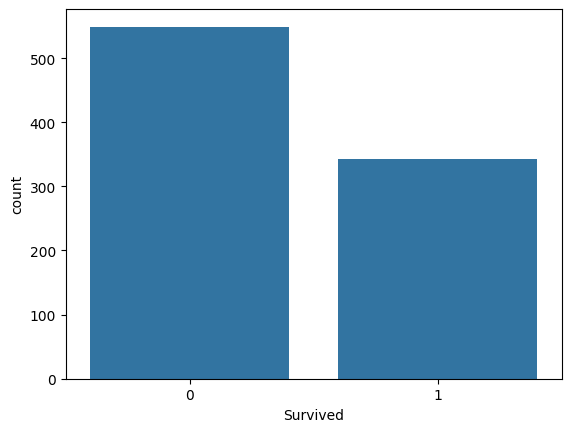

In [ ]:
#import seabon and visulize it using it
sb.countplot(x='Survived', data = train_data)


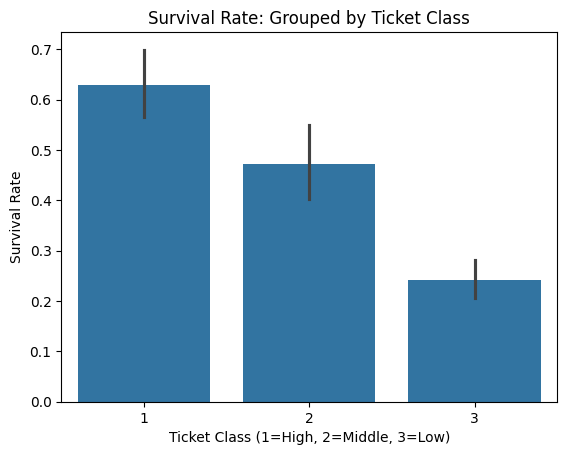

In [ ]:
#here we can se the surviavle rate depend on the passenger class

sb.barplot(data=train_data, x='Pclass', y='Survived')
plt.title('Survival Rate: Grouped by Ticket Class')
plt.xlabel('Ticket Class (1=High, 2=Middle, 3=Low)')
plt.ylabel('Survival Rate')
plt.show()

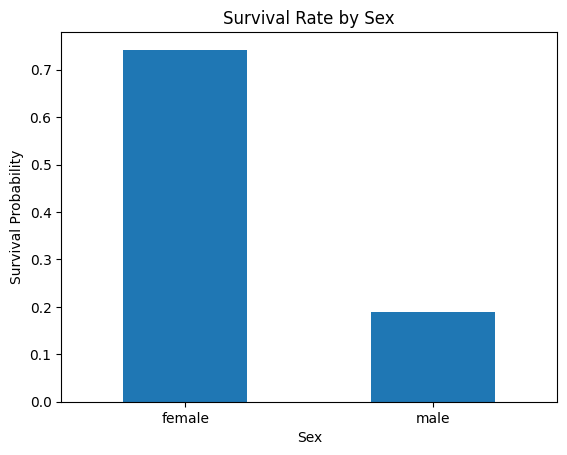

In [ ]:
#Group by Sex and get the mean of Survived
survival_by_sex = train_data.groupby('Sex')['Survived'].mean()

#Plot the resulting series
survival_by_sex.plot(kind='bar')

#Add labels to make it readable
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Probability')
plt.xlabel('Sex')
plt.xticks(rotation=0) # Keeps 'female' and 'male' text horizontal
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

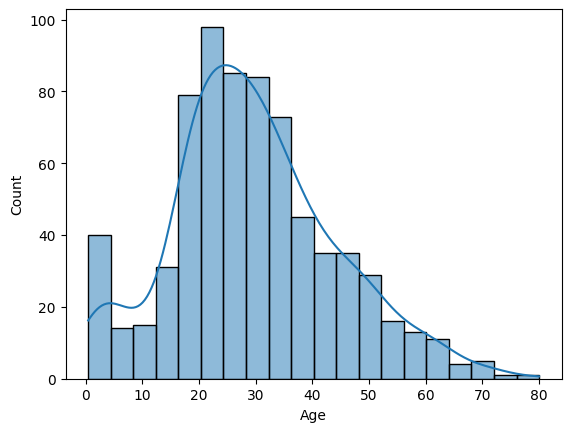

In [56]:
#visualize the age distribution of the passenger
sb.histplot(train_data['Age'].dropna(), kde=True)

In [135]:
#now let count the missing valur in each column
train_data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [137]:
#lets fill the missing value on the TRAIN DATA
from sklearn.impute import SimpleImputer
age_imputer =SimpleImputer(strategy='median')
train_data['Age'] = age_imputer.fit_transform(train_data[['Age']])

#and now for the embarked
embarked_imputer= SimpleImputer(strategy='most_frequent')
train_data['Embarked'] = embarked_imputer.fit_transform(train_data[['Embarked']]).flatten()


In [138]:
#lets fill the missing value on the TEST DATA
from sklearn.impute import SimpleImputer
age_imputer =SimpleImputer(strategy='median')
test_data['Age'] = age_imputer.fit_transform(test_data[['Age']])

#and now for the FARE
fare_imputer= SimpleImputer(strategy='median')
test_data['Fare'] = fare_imputer.fit_transform(test_data[['Fare']])


In [139]:
#lets cover the sex from male and female to 0 and 1 ON THE TRAIN DATA
train_data['Sex']= train_data['Sex'].map({'male': 0, 'female':1})

#convert the embarked s to 0 , c to 1 and q to 2
train_data['Embarked']= train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [140]:
#lets cover the sex from male and female to 0 and 1 ON THE TEST DATA
test_data['Sex']= test_data['Sex'].map({'male': 0, 'female':1})

#convert the embarked s to 0 , c to 1 and q to 2
test_data['Embarked']= test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [141]:
#Create the new feature: 1 if Cabin is known, 0 if Cabin is null FOR TRAIN DATA
#we use 'notnull()' to find defined values and 'astype(int)' to make them 0 or 1
train_data['Has_Cabin'] = train_data['Cabin'].notnull().astype(int)

#Now we can safely drop the original 'Cabin' column
train_data.drop(columns=['Cabin'], inplace=True)

#Check the distribution to see how many people had cabins
print(train_data['Has_Cabin'].value_counts())

Has_Cabin
0    687
1    204
Name: count, dtype: int64


In [142]:
#Create the new feature: 1 if Cabin is known, 0 if Cabin is null FOR TEST DATA
#we use 'notnull()' to find defined values and 'astype(int)' to make them 0 or 1
test_data['Has_Cabin'] = test_data['Cabin'].notnull().astype(int)

#Now we can safely drop the original 'Cabin' column
test_data.drop(columns=['Cabin'], inplace=True)

#Check the distribution to see how many people had cabins
print(test_data['Has_Cabin'].value_counts())

Has_Cabin
0    327
1     91
Name: count, dtype: int64


In [ ]:
#see how many Mr value are in 
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)
train_data['Title'].value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\MM2\AppData\Local\Temp\ipykernel_11344\917526399.py:1: SyntaxWarning: invalid escape sequence '\.'
  train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
##see how many Mr value are in 
test_data['Title'] = test_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)
test_data['Title'].value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\MM2\AppData\Local\Temp\ipykernel_11344\3988921128.py:1: SyntaxWarning: invalid escape sequence '\.'
  test_data['Title'] = test_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)


Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [145]:
# List of titles you want to group as 'Rare' FOR THE TRAIN DATA
rare_titles = ['Don','Sir','Lady','Countess','Capt','Col','Major','Jonkheer','Mme','Mlle','Ms']

# Replace all those with 'Rare'
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Rare')

# Verify the grouping
print(train_data['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       14
Dr          7
Rev         6
Name: count, dtype: int64


In [146]:
# List of titles you want to group as 'Rare' FOR THE TEST DATA
rare_titles = ['Don','Dona','Sir','Lady','Countess','Capt','Col','Major','Jonkheer','Mme','Mlle','Ms']

# Replace all those with 'Rare'
test_data['Title'] = test_data['Title'].replace(rare_titles, 'Rare')

# Verify the grouping
print(test_data['Title'].value_counts())

Title
Mr        240
Miss       78
Mrs        72
Master     21
Rare        4
Rev         2
Dr          1
Name: count, dtype: int64


In [147]:
# Mapping titles to numbers FOR THE TREAIN DATA
title_mapping = {"Mr": 0, "Mrs": 1, "Miss": 2, "Master": 3,"Dr":4,"Rev":5, "Rare": 6}
train_data['Title'] = train_data['Title'].map(title_mapping)

# Check the first few rows to see the new column
train_data[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",2
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0


In [148]:
# Mapping titles to numbers FOR THE TEST DATA
title_mapping = {"Mr": 0, "Mrs": 1, "Miss": 2, "Master": 3,"Dr":4,"Rev":5, "Rare": 6}
test_data['Title'] = test_data['Title'].map(title_mapping)

# Check the first few rows to see the new column
test_data[['Name', 'Title']].head()

,Name,Title
0,"Kelly, Mr. James",0
1,"Wilkes, Mrs. James (Ellen Needs)",1
2,"Myles, Mr. Thomas Francis",0
3,"Wirz, Mr. Albert",0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1


In [149]:

#Drop the text columns we no longer need (Name, Ticket)
#We also drop PassengerId as it's just a sequence number
train_data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
test_data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [ ]:
#Age Binning (0-10=0, 10-20=1, 20-35=2, 35-50=3, >50=4)  FOR THE TRAIN DATA
#We define the bins (edges) and the labels (group numbers)
age_bins = [0, 10, 20, 35, 50, 100]
age_labels = [0, 1, 2, 3, 4]
train_data['Age'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels)

#Fare Binning (4 equal-sized groups)
# qcut automatically finds the ranges to put 25% of passengers in each group
train_data['Fare'] = pd.qcut(train_data['Fare'], q=4, labels=[0, 1, 2, 3])

#Convert these to integers
train_data['Age'] = train_data['Age'].astype(int)
train_data['Fare'] = train_data['Fare'].astype(int)

# Check the results
train_data[['Age', 'Fare']].head()

,Age,Fare
0,2,0
1,3,3
2,2,1
3,2,3
4,2,1


In [ ]:
#Age Binning (0-10=0, 10-20=1, 20-35=2, 35-50=3, >50=4)   FOR THE TEST DATA
#We define the bins (edges) and the labels (group numbers)
age_bins = [0, 10, 20, 35, 50, 100]
age_labels = [0, 1, 2, 3, 4]
test_data['Age'] = pd.cut(test_data['Age'], bins=age_bins, labels=age_labels)

# Fare Binning (4 equal-sized groups)
#qcut automatically finds the ranges to put 25% of passengers in each group
test_data['Fare'] = pd.qcut(test_data['Fare'], q=4, labels=[0, 1, 2, 3])

#Convert these to integers
test_data['Age'] = test_data['Age'].astype(int)
test_data['Fare'] = test_data['Fare'].astype(int)

#Check the results
test_data[['Age', 'Fare']].head()

,Age,Fare
0,2,0
1,3,0
2,4,1
3,2,1
4,2,1


In [154]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify everything is a number
print("Final Features List:", X.columns.tolist())
X_train.head()

Final Features List: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'Title']


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
331,1,0,3,0,0,2,0,1,0
733,2,0,2,0,0,1,0,0,0
382,3,0,2,0,0,1,0,0,0
704,3,0,2,1,0,0,0,0,0
813,3,1,0,4,2,3,0,0,2


In [155]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Random Forest model
# random_state ensures you get the same result every time you run it
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# 2. Train (Fit) the model using our training data
rf_model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

#Make predictions on the validation set
y_pred = rf_model.predict(X_val)

#Check the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2%}")

#See detailed metrics (Precision, Recall)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Validation Accuracy: 81.56%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
#Use your trained model to predict who survived in the test set
#This converts your test_data features into 0s and 1s
test_predictions = rf_model.predict(test_data)

#Create the final results table
import pandas as pd
#We reload the original test file just to get the PassengerIds
original_test = pd.read_csv('./Data/test.csv') 

submission = pd.DataFrame({
    "PassengerId": original_test["PassengerId"],
    "Survived": test_predictions
})

#Save to a CSV file
submission.to_csv('final_predictions.csv', index=False)

#Show the first few results to confirm it worked
print("Predictions finished! Here are the first 5 results:")
print(submission.head())

Predictions finished! Here are the first 5 results:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


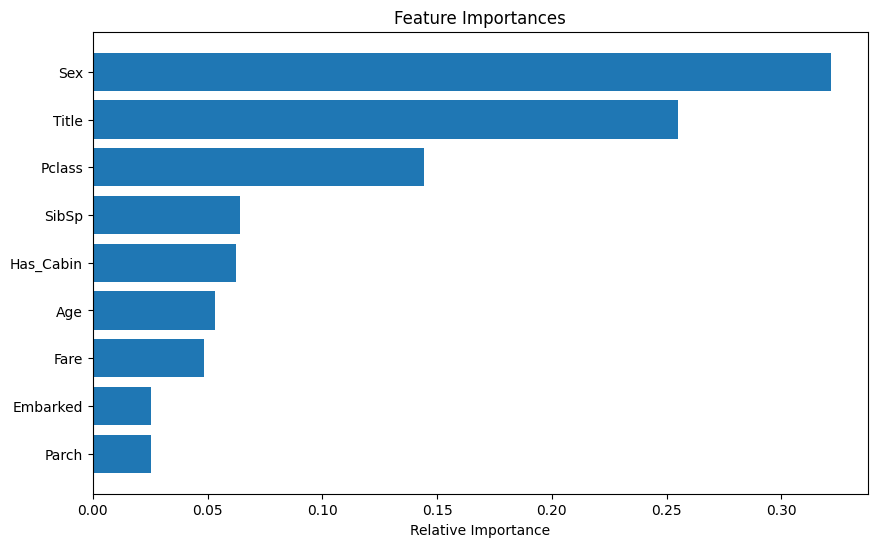

In [ ]:
# Get importance levels from the model
importances = rf_model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

# Plot the results
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [152]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,3,0,2,0,0,0,2,0,0
1,3,1,3,1,0,0,0,0,1
2,2,0,4,0,0,1,2,0,0
3,3,0,2,0,0,1,0,0,0
4,3,1,2,1,1,1,0,0,1


In [153]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,0,3,0,2,1,0,0,0,0,0
1,1,1,1,3,1,0,3,1,1,1
2,1,3,1,2,0,0,1,0,0,2
3,1,1,1,2,1,0,3,0,1,1
4,0,3,0,2,0,0,1,0,0,0
